In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn


Importing Data and Reading Data 


In [2]:
dataset = pd.read_csv('train.csv') 

In [3]:
dataset.head(6)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.0


In [4]:
dataset.tail(6)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
21257,3,89.389833,89.389833,63.694713,63.694713,0.782574,0.782574,164.13150,54.710500,73.156893,...,4.666667,4.578857,4.578857,1.078992,1.078992,2,0.666667,0.942809,0.942809,3.43
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84
21262,3,87.468333,86.858500,82.555758,80.458722,1.041270,0.895229,71.75500,43.144000,29.905282,...,4.500000,4.762203,4.242641,1.054920,0.970116,3,1.800000,1.414214,1.500000,12.80


In [5]:
dataset.shape

(21263, 82)

In [6]:
dataset.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [7]:
dataset.keys


<bound method NDFrame.keys of        number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795 

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [9]:
dataset.describe()['critical_temp']

count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

Step:2 Data Visualisation 

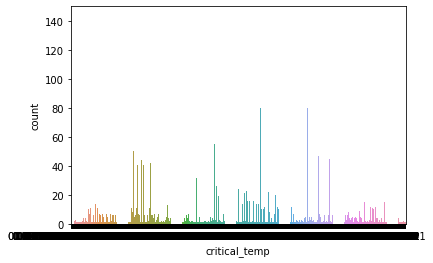

In [10]:
sns.countplot(x = 'critical_temp',data = dataset)

In [11]:
b=dataset.corr()
b


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
number_of_elements,1.000000,-0.141923,-0.353064,-0.292969,-0.454525,0.939304,0.881845,0.682777,-0.320293,0.513998,...,-0.648551,-0.618512,-0.659268,0.967832,0.892559,0.231874,-0.447770,0.105365,0.035216,0.601069
mean_atomic_mass,-0.141923,1.000000,0.815977,0.940298,0.745841,-0.104000,-0.097609,0.125659,0.446225,0.196460,...,0.304683,0.392153,0.321399,-0.156786,-0.145610,-0.107450,0.168633,-0.080279,-0.081253,-0.113523
wtd_mean_atomic_mass,-0.353064,0.815977,1.000000,0.848242,0.964085,-0.308046,-0.412666,-0.144029,0.716623,-0.060739,...,0.545587,0.539780,0.548981,-0.375718,-0.331025,-0.039155,0.330904,-0.003681,0.077323,-0.312272
gmean_atomic_mass,-0.292969,0.940298,0.848242,1.000000,0.856975,-0.190214,-0.232183,-0.175861,0.458473,-0.121708,...,0.427961,0.511508,0.450357,-0.306246,-0.307662,-0.165010,0.272303,-0.124627,-0.117336,-0.230345
wtd_gmean_atomic_mass,-0.454525,0.745841,0.964085,0.856975,1.000000,-0.370561,-0.484664,-0.352093,0.673326,-0.274487,...,0.614100,0.608417,0.623261,-0.477785,-0.448072,-0.078641,0.409674,-0.033313,0.030361,-0.369858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
range_Valence,0.231874,-0.107450,-0.039155,-0.165010,-0.078641,0.203207,0.161350,0.208861,0.023251,0.192347,...,0.111249,-0.041651,0.033007,0.155410,0.204411,1.000000,0.114000,0.973788,0.867393,-0.143546
wtd_range_Valence,-0.447770,0.168633,0.330904,0.272303,0.409674,-0.350047,-0.546910,-0.365395,0.594214,-0.273598,...,0.683700,0.532805,0.681415,-0.417283,-0.639818,0.114000,1.000000,0.184380,0.132162,-0.439901
std_Valence,0.105365,-0.080279,-0.003681,-0.124627,-0.033313,0.087838,0.056309,0.134676,0.066739,0.144106,...,0.186270,0.034589,0.108469,0.034580,0.089774,0.973788,0.184380,1.000000,0.885856,-0.208072
wtd_std_Valence,0.035216,-0.081253,0.077323,-0.117336,0.030361,0.018758,-0.006937,0.102634,0.092819,0.122547,...,0.258593,0.088388,0.168962,-0.017031,0.081284,0.867393,0.132162,0.885856,1.000000,-0.300028


In [12]:
b.sort_values('critical_temp',axis=1)

,wtd_mean_Valence,wtd_gmean_Valence,mean_Valence,gmean_Valence,gmean_Density,wtd_gmean_Density,wtd_range_Valence,wtd_mean_Density,wtd_gmean_FusionHeat,gmean_FusionHeat,...,wtd_std_atomic_radius,range_fie,number_of_elements,wtd_entropy_atomic_radius,wtd_entropy_atomic_mass,std_ThermalConductivity,range_atomic_radius,range_ThermalConductivity,wtd_std_ThermalConductivity,critical_temp
number_of_elements,-0.648551,-0.659268,-0.609412,-0.618512,-0.630504,-0.649882,-0.447770,-0.507895,-0.519109,-0.514252,...,0.695089,0.781227,1.000000,0.904121,0.881845,0.602018,0.768060,0.696060,0.665580,0.601069
mean_atomic_mass,0.304683,0.321399,0.374099,0.392153,0.596485,0.525588,0.168633,0.608935,-0.043003,0.014818,...,-0.280440,-0.255628,-0.141923,-0.147604,-0.097609,-0.110658,-0.270695,-0.114538,-0.110856,-0.113523
wtd_mean_atomic_mass,0.545587,0.548981,0.534450,0.539780,0.712815,0.767011,0.330904,0.842665,0.120044,0.164239,...,-0.554820,-0.452303,-0.353064,-0.400483,-0.412666,-0.362512,-0.524861,-0.376573,-0.350993,-0.312272
gmean_atomic_mass,0.427961,0.450357,0.487021,0.511508,0.728477,0.663642,0.272303,0.677131,0.024199,0.086599,...,-0.462397,-0.431689,-0.292969,-0.311701,-0.232183,-0.233587,-0.460197,-0.243465,-0.232079,-0.230345
wtd_gmean_atomic_mass,0.614100,0.623261,0.599413,0.608417,0.789208,0.843708,0.409674,0.852608,0.189353,0.219751,...,-0.681130,-0.575369,-0.454525,-0.514618,-0.484664,-0.447236,-0.645663,-0.464856,-0.431027,-0.369858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
range_Valence,0.111249,0.033007,0.085892,-0.041651,-0.126403,-0.087742,0.114000,-0.046327,-0.034940,-0.110862,...,0.039561,0.165729,0.231874,0.226873,0.161350,-0.174000,0.071772,-0.137581,-0.187465,-0.143546
wtd_range_Valence,0.683700,0.681415,0.554338,0.532805,0.534758,0.571594,1.000000,0.485224,0.425550,0.333871,...,-0.543134,-0.532162,-0.447770,-0.576320,-0.546910,-0.443612,-0.524775,-0.472197,-0.509148,-0.439901
std_Valence,0.186270,0.108469,0.164058,0.034589,-0.052438,-0.014400,0.184380,0.013178,0.022502,-0.060116,...,-0.031263,0.061327,0.105365,0.114904,0.056309,-0.209550,-0.010696,-0.187087,-0.232050,-0.208072
wtd_std_Valence,0.258593,0.168962,0.203341,0.088388,-0.000917,0.056154,0.132162,0.088027,0.068536,0.008076,...,-0.109204,-0.007883,0.035216,0.093575,-0.006937,-0.306211,-0.092673,-0.289559,-0.323640,-0.300028


In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset_scaled)

In [14]:
# Calculation of MinMaxScaler
data_atomic_mass=dataset.iloc[:,1:11]
data_atomic_mass_max = pd.DataFrame.max(data_atomic_mass)
data_atomic_mass_min = pd.DataFrame.min(data_atomic_mass)
print('Max Values:',data_atomic_mass_max)
print('Min Values:',data_atomic_mass_min)

Max Values: mean_atomic_mass           208.980400
wtd_mean_atomic_mass       208.980400
gmean_atomic_mass          208.980400
wtd_gmean_atomic_mass      208.980400
entropy_atomic_mass          1.983797
wtd_entropy_atomic_mass      1.958203
range_atomic_mass          207.972460
wtd_range_atomic_mass      205.589910
std_atomic_mass            101.019700
wtd_std_atomic_mass        101.019700
dtype: float64
Min Values: mean_atomic_mass           6.941000
wtd_mean_atomic_mass       6.423452
gmean_atomic_mass          5.320573
wtd_gmean_atomic_mass      1.960849
entropy_atomic_mass        0.000000
wtd_entropy_atomic_mass    0.000000
range_atomic_mass          0.000000
wtd_range_atomic_mass      0.000000
std_atomic_mass            0.000000
wtd_std_atomic_mass        0.000000
dtype: float64


In [15]:
# Scaled data by using MinMaxScaler
dataset_scaled

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,0.375,0.405879,0.253950,0.299720,0.164988,0.595724,0.542536,0.590973,0.154652,0.514443,...,0.209524,0.202227,0.203297,0.639097,0.546853,0.166667,0.155275,0.144338,0.145686,0.156756
1,0.500,0.424611,0.257187,0.332968,0.166341,0.730573,0.540166,0.590973,0.175894,0.466193,...,0.209524,0.148029,0.201780,0.726956,0.537109,0.333333,0.161404,0.210819,0.156202,0.140540
2,0.375,0.405879,0.254061,0.299720,0.165017,0.595724,0.498406,0.590973,0.173847,0.514443,...,0.211905,0.202227,0.205446,0.639097,0.527853,0.166667,0.159361,0.144338,0.148232,0.102702
3,0.375,0.405879,0.254005,0.299720,0.165002,0.595724,0.522056,0.590973,0.164249,0.514443,...,0.210714,0.202227,0.204370,0.639097,0.537936,0.166667,0.157318,0.144338,0.146984,0.118918
4,0.375,0.405879,0.253838,0.299720,0.164960,0.595724,0.576663,0.590973,0.135458,0.514443,...,0.207143,0.202227,0.201160,0.639097,0.562153,0.166667,0.151189,0.144338,0.142936,0.124323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.375,0.495037,0.230416,0.379038,0.198893,0.593380,0.640444,0.706254,0.075415,0.651003,...,0.425926,0.370618,0.419985,0.643251,0.468605,0.166667,0.310187,0.144338,0.165635,0.013188
21259,0.500,0.422322,0.210301,0.292115,0.149295,0.667047,0.802588,0.905812,0.035767,0.685338,...,0.174603,0.194824,0.173165,0.744255,0.685859,0.166667,0.129396,0.133333,0.070986,0.660000
21260,0.125,0.458931,0.440299,0.462110,0.451665,0.348245,0.270757,0.064978,0.257995,0.066886,...,0.633333,0.578689,0.630294,0.320716,0.231088,0.166667,0.457653,0.166667,0.133333,0.010702
21261,0.125,0.458931,0.447638,0.462110,0.458605,0.348245,0.327281,0.064978,0.151346,0.066886,...,0.615000,0.578689,0.610970,0.320716,0.296245,0.166667,0.316066,0.166667,0.154164,0.009945


In [16]:
X = dataset_scaled.iloc[:,:-1].values
n_samples, n_features = X.shape
Y = dataset_scaled.iloc[:,[81]].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

print("X_shape:", X.shape)
print("Y_shape:", Y.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)
print("n_samples:", n_samples)
print("n_features:", n_features)

X_shape: (21263, 81)
Y_shape: (21263, 1)
X_train shape: (17010, 81)
X_test shape: (4253, 81)
Y_train shape: (17010, 1)
Y_test shape: (4253, 1)
n_samples: 21263
n_features: 81


In [17]:
# converting np.array to torch.tensor
X_train = torch.as_tensor(np.array(X_train).astype('float32'))
X_test = torch.as_tensor(np.array(X_test).astype('float32'))
Y_train = torch.as_tensor(np.array(Y_train).astype('float32'))
Y_test = torch.as_tensor(np.array(Y_test).astype('float32'))

In [18]:
class LinearRegression(nn.Module):
    def __init__(self, input_size,output_size):
        super(LinearRegression, self).__init__()
        self.l1 = nn.Linear(input_dim, hidden_layers)
        self.l2 = nn.Linear(hidden_layers, output_dim)

    def forward(self, X):
        out = self.l1(X)
        out1 = self.l2(out)
        return out1

In [19]:
# create class model
input_dim = n_features
output_dim = 1
hidden_layers = 100
model = LinearRegression(input_dim, output_dim)

In [20]:
# loss:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

#return F.mse_loss(n_features, 1, reduction=self.reduction)

In [21]:
# training:
from tqdm import tqdm 
n_epochs = 3000
for epoch in tqdm(range(n_epochs)):
    optimizer.zero_grad() #zero_grad
    y_prediction = model(X_train) # forward pass
    loss = criterion(y_prediction, Y_train)# loss
    loss.backward() # backward pass
    optimizer.step() # update weights
    
    if (epoch%100 == 0):
        print("epoch: {} ==> loss: {}\n".format(epoch,loss.data))

  0%|▏                                                                                | 7/3000 [00:00<19:40,  2.54it/s]

epoch: 0 ==> loss: 0.22288629412651062



  4%|██▊                                                                            | 105/3000 [00:02<00:57, 50.51it/s]

epoch: 100 ==> loss: 0.016275878995656967



  7%|█████▍                                                                         | 207/3000 [00:04<00:52, 53.23it/s]

epoch: 200 ==> loss: 0.014968940988183022



 10%|████████▏                                                                      | 309/3000 [00:06<00:51, 52.50it/s]

epoch: 300 ==> loss: 0.014238246716558933



 14%|██████████▊                                                                    | 410/3000 [00:08<00:49, 52.65it/s]

epoch: 400 ==> loss: 0.013698880560696125



 17%|█████████████▎                                                                 | 506/3000 [00:10<00:47, 53.03it/s]

epoch: 500 ==> loss: 0.013271243311464787



 20%|████████████████                                                               | 608/3000 [00:12<00:44, 53.87it/s]

epoch: 600 ==> loss: 0.012920482084155083



 24%|██████████████████▋                                                            | 710/3000 [00:14<00:43, 52.96it/s]

epoch: 700 ==> loss: 0.01262660976499319



 27%|█████████████████████▏                                                         | 806/3000 [00:15<00:40, 53.70it/s]

epoch: 800 ==> loss: 0.012376763857901096



 30%|███████████████████████▉                                                       | 908/3000 [00:17<00:39, 52.66it/s]

epoch: 900 ==> loss: 0.012162022292613983



 34%|██████████████████████████▎                                                   | 1010/3000 [00:19<00:37, 53.53it/s]

epoch: 1000 ==> loss: 0.01197588536888361



 37%|████████████████████████████▊                                                 | 1106/3000 [00:21<00:35, 53.56it/s]

epoch: 1100 ==> loss: 0.011813435703516006



 40%|███████████████████████████████▍                                              | 1208/3000 [00:23<00:32, 54.66it/s]

epoch: 1200 ==> loss: 0.011670851148664951



 44%|██████████████████████████████████                                            | 1310/3000 [00:25<00:31, 54.14it/s]

epoch: 1300 ==> loss: 0.011545115150511265



 47%|████████████████████████████████████▌                                         | 1406/3000 [00:27<00:30, 53.12it/s]

epoch: 1400 ==> loss: 0.011433793231844902



 50%|███████████████████████████████████████▏                                      | 1508/3000 [00:29<00:27, 53.57it/s]

epoch: 1500 ==> loss: 0.011334903538227081



 54%|█████████████████████████████████████████▊                                    | 1610/3000 [00:31<00:26, 53.43it/s]

epoch: 1600 ==> loss: 0.011246796697378159



 57%|████████████████████████████████████████████▎                                 | 1706/3000 [00:32<00:24, 53.76it/s]

epoch: 1700 ==> loss: 0.0111681018024683



 60%|███████████████████████████████████████████████                               | 1808/3000 [00:34<00:22, 53.30it/s]

epoch: 1800 ==> loss: 0.011097638867795467



 64%|█████████████████████████████████████████████████▌                            | 1908/3000 [00:37<00:25, 42.70it/s]

epoch: 1900 ==> loss: 0.011034405790269375



 67%|████████████████████████████████████████████████████▏                         | 2009/3000 [00:38<00:20, 47.65it/s]

epoch: 2000 ==> loss: 0.010977530851960182



 70%|██████████████████████████████████████████████████████▊                       | 2106/3000 [00:41<00:17, 50.20it/s]

epoch: 2100 ==> loss: 0.01092625129967928



 74%|█████████████████████████████████████████████████████████▍                    | 2208/3000 [00:42<00:14, 52.93it/s]

epoch: 2200 ==> loss: 0.010879899375140667



 77%|███████████████████████████████████████████████████████████▉                  | 2307/3000 [00:45<00:15, 44.14it/s]

epoch: 2300 ==> loss: 0.010837891139090061



 80%|██████████████████████████████████████████████████████████████▌               | 2408/3000 [00:46<00:11, 52.28it/s]

epoch: 2400 ==> loss: 0.010799712501466274



 84%|█████████████████████████████████████████████████████████████████▎            | 2510/3000 [00:48<00:09, 53.53it/s]

epoch: 2500 ==> loss: 0.01076490618288517



 87%|███████████████████████████████████████████████████████████████████▋          | 2605/3000 [00:50<00:07, 51.12it/s]

epoch: 2600 ==> loss: 0.01073306705802679



 90%|██████████████████████████████████████████████████████████████████████▍       | 2707/3000 [00:52<00:06, 47.91it/s]

epoch: 2700 ==> loss: 0.01070384681224823



 94%|████████████████████████████████████████████████████████████████████████▉     | 2805/3000 [00:54<00:03, 51.08it/s]

epoch: 2800 ==> loss: 0.010676934383809566



 97%|███████████████████████████████████████████████████████████████████████████▌  | 2907/3000 [00:56<00:01, 50.62it/s]

epoch: 2900 ==> loss: 0.010652054101228714



100%|██████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:58<00:00, 51.28it/s]


In [22]:
with torch.no_grad():
    y_prediction = model(X_test)
    y_prediction_cls = y_prediction.round()
    acc = y_prediction_cls.eq(X_test).sum() / float(X_test.shape[0])
    print(f'Accuracy ={acc*100}')


Accuracy =86.62120819091797


In [23]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y_test,y_prediction)
rmse=np.sqrt(mse)
print("MSE is:", mse)
print("The RMSE is :",rmse)
print("The R2 Score:",r2_score(Y_test,y_prediction)*100)

MSE is: 0.010047973
The RMSE is : 0.10023958
The R2 Score: 70.1244958481205


tensor([[-0.0122],
        [-0.0793],
        [ 0.1098],
        ...,
        [ 0.1018],
        [-0.0327],
        [ 0.1065]], grad_fn=<SubBackward0>)


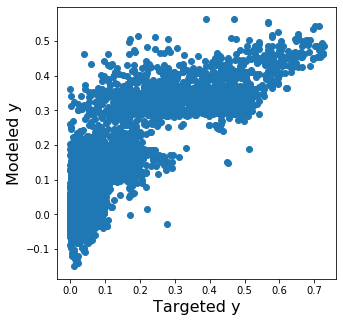

In [24]:
y_last = model(X_test)
print(y_last - Y_test)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
plt.plot(Y_test.detach().numpy(), y_last.detach().numpy(), 'o')
plt.xlabel('Targeted y', fontsize=16)
plt.ylabel('Modeled y', fontsize=16)
plt.savefig('Model_validation')

In [25]:
#data_atomic_mass=dataset.iloc[:,1:11]
#data_atomic_radius=dataset.iloc[:,21:31]
#data_electron_affinity=dataset.iloc[:,41:51]
#data_thermal_conductivity=dataset.iloc[:,61:71]
#data_valence=dataset.iloc[:,71:81]

In [26]:
#total = data_atomic_mass.copy()
#total = pd.concat([data_atomic_radius,total], axis=1)
#total = pd.concat([data_electron_affinity,total], axis=1)
#total = pd.concat([data_thermal_conductivity,total], axis=1)
#total = pd.concat([data_valence,total], axis=1)
#total.shape

